In [2]:
import pandas as pd
import numpy as np
import statistics as stat
from tabulate import tabulate
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [3]:
imdb=pd.read_csv(r"C:\Users\hp RED\PycharmProjects\DataScience\Datasets\imdb.csv", sep=',')
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
data=imdb
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
data = data[data['color'].notna()]
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
data = data[data['imdb_score'].notna()]
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [7]:
data = data[data['duration'].notna()]
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [8]:
data = data[data['gross'].notna()]
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [9]:
data = data[data['budget'].notna()]
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


In [10]:
data = data[data['country'].notna()]
data = data[data['director_name'].notna()]
data = data[data['num_critic_for_reviews'].notna()]
data = data[data['director_facebook_likes'].notna()]
data = data[data['actor_3_facebook_likes'].notna()]
data = data[data['actor_2_name'].notna()]
data = data[data['actor_1_facebook_likes'].notna()]
data = data[data['genres'].notna()]
data = data[data['actor_1_name'].notna()]
data = data[data['movie_title'].notna()]
data = data[data['num_voted_users'].notna()]
data = data[data['cast_total_facebook_likes'].notna()]
data = data[data['actor_3_name'].notna()]
data = data[data['facenumber_in_poster'].notna()]
data = data[data['plot_keywords'].notna()]
data = data[data['movie_imdb_link'].notna()]
data = data[data['num_user_for_reviews'].notna()]
data = data[data['language'].notna()]
data = data[data['content_rating'].notna()]
data = data[data['title_year'].notna()]
data = data[data['actor_2_facebook_likes'].notna()]
data = data[data['aspect_ratio'].notna()]
data = data[data['movie_facebook_likes'].notna()]


In [11]:
color=data[data['color']=='Color']
data_color=pd.DataFrame(color)
data_color

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [12]:
B_N=data[data['color']!='Color']
dataB_N=pd.DataFrame(B_N)
dataB_N

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
111,Black and White,Michael Bay,191.0,184.0,0.0,691.0,Jaime King,3000.0,198539855.0,Action|Drama|History|Romance|War,...,1999.0,English,USA,PG-13,140000000.0,2001.0,961.0,6.1,2.35,0
149,Black and White,Lee Tamahori,264.0,133.0,93.0,746.0,Colin Salmon,769.0,160201106.0,Action|Adventure|Thriller,...,1185.0,English,UK,PG-13,142000000.0,2002.0,766.0,6.1,2.35,0
257,Black and White,Martin Scorsese,267.0,170.0,17000.0,827.0,Adam Scott,29000.0,102608827.0,Biography|Drama,...,799.0,English,USA,PG-13,110000000.0,2004.0,3000.0,7.5,2.35,0
272,Black and White,Michael Mann,174.0,165.0,0.0,780.0,Jada Pinkett Smith,10000.0,58183966.0,Biography|Drama|Sport,...,386.0,English,USA,R,107000000.0,2001.0,851.0,6.8,2.35,0
286,Black and White,Martin Campbell,400.0,144.0,258.0,834.0,Tobias Menzies,6000.0,167007184.0,Action|Adventure|Thriller,...,2301.0,English,UK,PG-13,150000000.0,2006.0,1000.0,8.0,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,Black and White,Spike Lee,26.0,88.0,0.0,46.0,Joie Lee,539.0,7137502.0,Comedy|Romance,...,26.0,English,USA,R,175000.0,1986.0,53.0,6.5,1.85,406
4962,Black and White,Larry Blamire,88.0,90.0,56.0,56.0,Brian Howe,126.0,110536.0,Comedy|Horror|Sci-Fi,...,118.0,English,USA,PG,40000.0,2001.0,76.0,7.0,1.85,0
4973,Black and White,Darren Aronofsky,138.0,84.0,0.0,194.0,Clint Mansell,1000.0,3216970.0,Drama|Mystery|Thriller,...,586.0,English,USA,R,60000.0,1998.0,512.0,7.5,1.66,24000
5008,Black and White,Kevin Smith,136.0,102.0,0.0,216.0,Brian O'Halloran,898.0,3151130.0,Comedy,...,615.0,English,USA,R,230000.0,1994.0,657.0,7.8,1.37,0


In [13]:
color_imdb_score=data_color['imdb_score']
BN_imdb_score=dataB_N['imdb_score']
color_title_year=data_color['title_year']
BN_title_year=dataB_N['title_year']
print("IMDB_SCORE_COLOR:", round(np.mean(color_imdb_score),2),"IMDB_SCORE_B&N:", round(np.mean(BN_imdb_score),2))
print(np.mean(color_title_year),np.mean(BN_title_year))


IMDB_SCORE_COLOR: 6.44 IMDB_SCORE_B&N: 7.14
2003.2566079295154 1994.774193548387


In [14]:
genero=data['genres']
genero

0           Action|Adventure|Fantasy|Sci-Fi
1                  Action|Adventure|Fantasy
2                 Action|Adventure|Thriller
3                           Action|Thriller
5                   Action|Adventure|Sci-Fi
                       ...                 
5026                    Drama|Music|Romance
5027                                  Drama
5033                  Drama|Sci-Fi|Thriller
5035    Action|Crime|Drama|Romance|Thriller
5042                            Documentary
Name: genres, Length: 3756, dtype: object

In [15]:
moda_genero=stat.mode(genero)
print(moda_genero)

Comedy|Drama|Romance


In [58]:
title_mode=data[data['genres']=='Comedy|Drama|Romance']
titles_mode=pd.DataFrame(title_mode['movie_title'])
print(titles_mode.to_markdown())

|      | movie_title                                        |
|-----:|:---------------------------------------------------|
|  233 | How Do You Know                                    |
|  333 | Sex and the City 2                                 |
|  410 | It's Complicated                                   |
|  451 | Something's Gotta Give                             |
|  453 | Four Christmases                                   |
|  549 | Spanglish                                          |
|  659 | You've Got Mail                                    |
|  703 | The American President                             |
|  822 | Did You Hear About the Morgans?                    |
|  849 | Maid in Manhattan                                  |
|  896 | Elizabethtown                                      |
|  913 | The Break-Up                                       |
|  932 | As Good as It Gets                                 |
|  953 | Crazy, Stupid, Love.                               |
|  986 |

In [56]:
rep_country=data['director_name'].value_counts()
rep_country

Steven Spielberg       25
Clint Eastwood         19
Woody Allen            19
Ridley Scott           17
Martin Scorsese        16
                       ..
Todd Lincoln            1
Julian Jarrold          1
Peter Farrelly          1
Michel Hazanavicius     1
Shane Carruth           1
Name: director_name, Length: 1659, dtype: int64

In [17]:
SS=data[data['director_name']=='Steven Spielberg']
SS_duration=SS['duration']
SS_gross=SS['gross']
SS_budget=SS['budget']
SS_imdb=SS['imdb_score']

In [18]:
WA=data[data['director_name']=='Woody Allen']
WA_duration=WA['duration']
WA_gross=WA['gross']
WA_budget=WA['budget']
WA_imdb=WA['imdb_score']

In [19]:
CE=data[data['director_name']=='Clint Eastwood']
CE_duration=CE['duration']
CE_gross=CE['gross']
CE_budget=CE['budget']
CE_imdb=CE['imdb_score']

In [20]:
RS=data[data['director_name']=='Ridley Scott']
RS_duration=RS['duration']
RS_gross=RS['gross']
RS_budget=RS['budget']
RS_imdb=RS['imdb_score']

In [21]:
TB=data[data['director_name']=='Tim Burton']
TB_duration=TB['duration']
TB_gross=TB['gross']
TB_budget=TB['budget']
TB_imdb=TB['imdb_score']

In [22]:
director=[["Steven Spielberg",np.mean(SS_imdb),np.mean(SS_duration),np.mean(SS_gross),np.mean(SS_budget),np.mean(SS_gross)-np.mean(SS_budget)],
          ["Woody Allen",np.mean(WA_imdb),np.mean(WA_duration),np.mean(WA_gross),np.mean(WA_budget),np.mean(WA_gross)-np.mean(WA_budget)],
          ["Clint Eastwood",np.mean(CE_imdb),np.mean(CE_duration),np.mean(CE_gross),np.mean(CE_budget),np.mean(CE_gross)-np.mean(CE_budget)],
          ["Ridley Scott",np.mean(RS_imdb),np.mean(RS_duration),np.mean(RS_gross),np.mean(RS_budget),np.mean(RS_gross)-np.mean(RS_budget)],
          ["Tim Burton",np.mean(TB_imdb),np.mean(TB_duration),np.mean(TB_gross),np.mean(TB_budget),np.mean(TB_gross)-np.mean(TB_budget)]]
pd.DataFrame(director, columns=["Director","imdb_score","Duración","Ganancias","Presupuesto", "Ganancia Total"])

,Director,imdb_score,Duración,Ganancias,Presupuesto,Ganancia Total
0,Steven Spielberg,7.544000,137.160000,1.645693e+08,6.511603e+07,9.945329e+07
1,Woody Allen,7.000000,101.842105,1.622871e+07,1.623684e+07,-8.134579e+03
2,Clint Eastwood,7.205263,131.736842,7.254322e+07,4.042632e+07,3.211690e+07
3,Ridley Scott,7.070588,142.294118,7.869245e+07,8.411765e+07,-5.425195e+06
4,Tim Burton,6.931250,109.937500,1.294547e+08,7.793750e+07,5.151722e+07


In [23]:
rep_country=data['country'].value_counts()
rep_country

USA               2987
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
Hong Kong           13
China               13
Italy               11
New Zealand         11
South Korea          8
Denmark              8
Ireland              7
Mexico               6
Brazil               5
India                5
Iran                 4
Thailand             4
Norway               4
Russia               3
Argentina            3
Netherlands          3
South Africa         3
Czech Republic       3
Hungary              2
Taiwan               2
Romania              2
Finland              1
Indonesia            1
Israel               1
Poland               1
Colombia             1
New Line             1
Iceland              1
Aruba                1
Peru                 1
Belgium              1
Georgia              1
West Germany         1
Chile                1
Official site        1
Greece     

In [24]:
USA=data[data['country']=='USA']
UK=data[data['country']=='UK']
NewZea=data[data['country']=='New Zealand']
Canada=data[data['country']=='Canada']
Australia=data[data['country']=='Australia']
Jap=data[data['country']=='Japan']
Ger=data[data['country']=='Germany']
China=data[data['country']=='China']
France=data[data['country']=='France']
Mex=data[data['country']=='Mexico']
Spain=data[data['country']=='Spain']
HK=data[data['country']=='Hong Kong']
India=data[data['country']=='India']
Italy=data[data['country']=='Italy']
Russia=data[data['country']=='Russia']

In [25]:
USA_budget=USA['budget']
mean_USA_budget=np.mean(USA_budget)
UK_budget=UK['budget']
mean_UK_budget=np.mean(UK_budget)
NewZea_budget=NewZea['budget']
mean_NewZea_budget=np.mean(NewZea_budget)
Canada_budget=Canada['budget']
mean_Canada_budget=np.mean(Canada_budget)
Australia_budget=Australia['budget']
mean_Australia_budget=np.mean(Australia_budget)
Jap_budget=Jap['budget']
mean_Jap_budget=np.mean(Jap_budget)
Ger_budget=Ger['budget']
mean_Ger_budget=np.mean(Ger_budget)
China_budget=China['budget']
mean_China_budget=np.mean(China_budget)
France_budget=France['budget']
mean_France_budget=np.mean(France_budget)
Mex_budget=Mex['budget']
mean_Mex_budget=np.mean(Mex_budget)
Spain_budget=Spain['budget']
mean_Spain_budget=np.mean(Spain_budget)
HK_budget=HK['budget']
mean_HK_budget=np.mean(HK_budget)
India_budget=India['budget']
mean_India_budget=np.mean(India_budget)
Italy_budget=Italy['budget']
mean_Italy_budget=np.mean(Italy_budget)

In [59]:
means=[['USA',mean_USA_budget],
['UK',mean_UK_budget],
['NZ',mean_NewZea_budget],
['CAN',mean_Canada_budget],
['AUS',mean_Australia_budget],
['JAP',mean_Jap_budget],
['GER',mean_Ger_budget],
['CHI',mean_China_budget],
['FRA',mean_France_budget],
['MEX',mean_Mex_budget],
['SPA',mean_Spain_budget],
['HK',mean_HK_budget],
['IND',mean_India_budget],
['ITA',mean_Italy_budget]]
pd.DataFrame(means,columns=['País','Media presupuestal'])
#print(tabulate(means,headers=['País','Media presupuestal']))

,País,Media presupuestal
0,USA,4.095690e+07
1,UK,3.142814e+07
2,NZ,9.572727e+07
3,CAN,2.299475e+07
4,AUS,3.785783e+07
5,JAP,4.627347e+08
6,GER,3.626125e+07
7,CHI,9.246400e+07
8,FRA,3.147024e+07
9,MEX,4.186462e+06


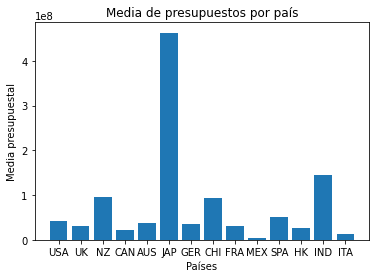

In [27]:
eje_x=['USA',
'UK',
'NZ',
'CAN',
'AUS',
'JAP',
'GER',
'CHI',
'FRA',
'MEX',
'SPA',
'HK',
'IND',
'ITA']
eje_y=[mean_USA_budget,
mean_UK_budget,
mean_NewZea_budget,
mean_Canada_budget,
mean_Australia_budget,
mean_Jap_budget,
mean_Ger_budget,
mean_China_budget,
mean_France_budget,
mean_Mex_budget,
mean_Spain_budget,
mean_HK_budget,
mean_India_budget,
mean_Italy_budget]
plt.bar(eje_x,eje_y)
plt.ylabel('Media presupuestal')
plt.xlabel('Países')
plt.title('Media de presupuestos por país')
plt.savefig('Barra.png')
plt.show()

In [28]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(50)

,variable_1,variable_2,r,abs_r
71,actor_1_facebook_likes,cast_total_facebook_likes,0.944813,0.944813
116,cast_total_facebook_likes,actor_1_facebook_likes,0.944813,0.944813
150,num_user_for_reviews,num_voted_users,0.778881,0.778881
105,num_voted_users,num_user_for_reviews,0.778881,0.778881
240,movie_facebook_likes,num_critic_for_reviews,0.705226,0.705226
15,num_critic_for_reviews,movie_facebook_likes,0.705226,0.705226
124,cast_total_facebook_likes,actor_2_facebook_likes,0.642991,0.642991
199,actor_2_facebook_likes,cast_total_facebook_likes,0.642991,0.642991
101,num_voted_users,gross,0.624949,0.624949
86,gross,num_voted_users,0.624949,0.624949


In [29]:
USA_gross=USA['gross']
UK_gross=UK['gross']
NewZea_gross=NewZea['gross']
Canada_gross=Canada['gross']
Australia_gross=Australia['gross']
Jap_gross=Jap['gross']
Ger_gross=Ger['gross']
China_gross=China['gross']
France_gross=France['gross']
Mex_gross=Mex['gross']
Spain_gross=Spain['gross']
HK_gross=HK['gross']
India_gross=India['gross']
Italy_gross=Italy['gross']

In [30]:
P_90_USA=USA_gross.quantile(0.9)
P_90_UK=UK_gross.quantile(0.9)
P_90_NewZea=NewZea_gross.quantile(0.9)
P_90_Canada=Canada_gross.quantile(0.9)
P_90_Australia=Australia_gross.quantile(0.9)
P_90_Jap=Jap_gross.quantile(0.9)
P_90_Ger=Ger_gross.quantile(0.9)
P_90_China=China_gross.quantile(0.9)
P_90_France=France_gross.quantile(0.9)
P_90_Mex=Mex_gross.quantile(0.9)
P_90_Spain=Spain_gross.quantile(0.9)
P_90_HK=HK_gross.quantile(0.9)
P_90_India=India_gross.quantile(0.9)
P_90_Italy=Italy_gross.quantile(0.9)

In [31]:
country=['USA','UK','NZ','Can','Aus','Jap','Ger','Chi','Fra','Mex','Esp','HK','Ind','Ita']
Means=[mean_USA_budget,
mean_UK_budget,
mean_NewZea_budget,
mean_Canada_budget,
mean_Australia_budget,
mean_Jap_budget,
mean_Ger_budget,
mean_China_budget,
mean_France_budget,
mean_Mex_budget,
mean_Spain_budget,
mean_HK_budget,
mean_India_budget,
mean_Italy_budget]
P_90=[P_90_USA,
P_90_UK,
P_90_NewZea,
P_90_Canada,
P_90_Australia,
P_90_Jap,
P_90_Ger,
P_90_China,
P_90_France,
P_90_Mex,
P_90_Spain,
P_90_HK,
P_90_India,
P_90_Italy]
dif=[]
for i in range(len(means)):
    dif.append(P_90[i]-Means[i])
dif
table=zip(country,dif)
pd.DataFrame(table,columns=['País','Diferencia del P_90 con la media presupuestal'])

,País,Diferencia del P_90 con la media presupuestal
0,USA,1.003016e+08
1,UK,3.993886e+07
2,NZ,1.593811e+08
3,Can,4.271391e+07
4,Aus,1.069550e+08
5,Jap,-3.833603e+08
6,Ger,3.673044e+07
7,Chi,-5.506837e+07
8,Fra,1.590885e+07
9,Mex,2.485296e+07


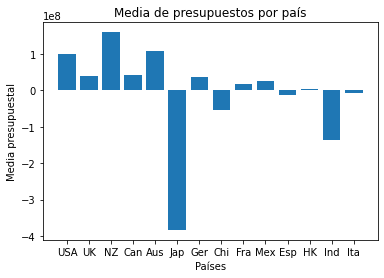

In [32]:
eje_x=country
eje_y=dif
plt.bar(eje_x,eje_y)
plt.ylabel('Media presupuestal')
plt.xlabel('Países')
plt.title('Media de presupuestos por país')
plt.savefig('Barra1.png')
plt.show()

In [33]:
print(mean_USA_budget,
mean_NewZea_budget)

40956904.65684634 95727272.72727273


In [34]:
NewZea_titles=NewZea['movie_title']
USA_titles=USA['movie_title']
UK_titles=UK['movie_title']
NewZea_titles=NewZea['movie_title']
Canada_titles=Canada['movie_title']
Australia_titles=Australia['movie_title']
Jap_titles=Jap['movie_title']
Ger_titles=Ger['movie_title']
China_titles=China['movie_title']
France_titles=France['movie_title']
Mex_titles=Mex['movie_title']
Spain_titles=Spain['movie_title']
HK_titles=HK['movie_title']
India_titles=India['movie_title']
Italy_titles=Italy['movie_title']

In [35]:
data['title_year'].min()

1927.0

In [36]:
min_year_movie=data[data['title_year']==1927]
min_year_movie['movie_title']

2734    Metropolis 
Name: movie_title, dtype: object

In [37]:
max_year_movie=data[data['title_year']==2016]
max_year_movie['movie_title']

10      Batman v Superman: Dawn of Justice 
27              Captain America: Civil War 
57                        Star Trek Beyond 
63                    The Legend of Tarzan 
65                       X-Men: Apocalypse 
73                           Suicide Squad 
79                         The Jungle Book 
92            Independence Day: Resurgence 
106        Alice Through the Looking Glass 
108                               Warcraft 
137                   The Legend of Tarzan 
150                           Ghostbusters 
154                        Kung Fu Panda 3 
163                          Gods of Egypt 
178                                The BFG 
225                           Jason Bourne 
244             The Huntsman: Winter's War 
264                              Allegiant 
380                       Now You See Me 2 
519                The Secret Life of Pets 
567                  The Angry Birds Movie 
762                      London Has Fallen 
812                             

In [39]:
data['title_year'].max()

2016.0

In [40]:
dataB_N['title_year'].min()

1927.0

In [41]:
dataB_N['title_year'].max()

2015.0

In [45]:
dataB_N_years=dataB_N[dataB_N['title_year']==2015]
dataB_N_years['movie_title']

2858    Ex Machina 
Name: movie_title, dtype: object

In [ ]:
dataB_N_years1=dataB_N[dataB_N['title_year']==1927]
dataB_N_years1['movie_title']

In [42]:
data_color['title_year'].min()

1937.0

In [43]:
data_color['title_year'].max()

2016.0

In [46]:
dataB_N_years.quantile(0.5)

num_critic_for_reviews            489.00
duration                          108.00
director_facebook_likes           232.00
actor_3_facebook_likes            123.00
actor_1_facebook_likes            149.00
gross                        25440971.00
num_voted_users                289508.00
cast_total_facebook_likes         430.00
facenumber_in_poster                0.00
num_user_for_reviews              611.00
budget                       15000000.00
title_year                       2015.00
actor_2_facebook_likes            145.00
imdb_score                          7.70
aspect_ratio                        2.35
movie_facebook_likes           109000.00
Name: 0.5, dtype: float64